# Install package


In [1]:
!pip install emoji
!pip install pythainlp

     |████████████████████████████████| 175 kB 7.5 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=48aa340575f6f372a8370679cae04f3b625e8204b370dd1657f707f23de325a3
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 11.5 MB 7.1 MB/s 


In [2]:
import tweepy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import emoji
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

## Data Processing

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
sheet1 = pd.read_excel('/content/gdrive/My Drive/dataset_701/sinopharm_astra.xlsx',sheet_name='Sheet1')

In [5]:
sheet1.shape

(4, 3)

In [6]:
sheet1.head()

user_name     create_at  \
0       @thereall_S  Oct 20, 2021   
1       @choidamiii  Oct 18, 2021   
2         @yyokamol   Oct 2, 2021   
3  @lemonadecandy85  Sep 26, 2021   

                                                text  
0  เด็กม.กุเริ่ดมากมีลงทะเบียนฉีดวัคซีนสูตรไขว้ซิ...  
1  อหหห กูพึ่งรู้เค้ามีฉีดไขว้ซิโนฟาร์ม แอสตร้าด้...  
2  ไขว้ซิโนฟาร์มแอสตร้า มีใครให้มากกว่าม.เปดนี่มั...  
3  เข้าใจว่ากลัว รัฐมันไม่น่าเชื่อถือ แต่อีป้ามหา...

In [7]:
sheet2 = pd.read_excel('/content/gdrive/My Drive/dataset_701/sinopharm_astra.xlsx',sheet_name='Sheet2')

In [8]:
sheet2.shape

(4, 3)

In [9]:
sheet2.head()

user_name     create_at  \
0        @em3mamew  Oct 21, 2021   
1  @BunyaratwanitB   Oct 8, 2021   
2       @Honeyppty  Aug 11, 2021   
3       @RuRugkita  Jul 21, 2021   

                                                text  
0  ล่าสุด ไขว้เข็มแรกซิโนฟาร์ม เข็ม2 แอสตร้า/ไฟเซ...  
1  ถ้าเข็มแรกยังไม่เคยฉีดตอนนี้ไขว้หมดเลยค่ะ เป็น...  
2  ยายเราได้ฉีดซิโนฟาร์มที่เป็นของจังหวัดไปเข็มแร...  
3  สลิ่มในเฟสชั้ลยังคงอวยซิโนแวคทุกวัน แต่เข็มแรก...

In [10]:
data1 = sheet1[['text']]
data2 = sheet2[['text']]
data3 = pd.concat([data1,data2])

In [11]:
data3.shape

(8, 1)

# Bag-of-Words

In [12]:
def slash_tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

d_data = data3["text"].dropna()
vectorizer = CountVectorizer(tokenizer=slash_tokenize)
transformed_data = vectorizer.fit_transform(d_data)
hash_tag_cnt_df= pd.DataFrame(columns = ['word', 'count']) 
hash_tag_cnt_df['word'] = vectorizer.get_feature_names()
hash_tag_cnt_df['count'] = np.ravel(transformed_data.sum(axis=0))
hash_tag_cnt_df.sort_values(by=['count'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


word  count
0  ถ้าเข็มแรกยังไม่เคยฉีดตอนนี้ไขว้หมดเลยค่ะ เป็น...      1
1  ยายเราได้ฉีดซิโนฟาร์มที่เป็นของจังหวัดไปเข็มแร...      1
2          ล่าสุด ไขว้เข็มแรกซิโนฟาร์ม เข็ม2 แอสตร้า      1
3  สลิ่มในเฟสชั้ลยังคงอวยซิโนแวคทุกวัน แต่เข็มแรก...      1
4  อหหห กูพึ่งรู้เค้ามีฉีดไขว้ซิโนฟาร์ม แอสตร้าด้...      1
5  เข้าใจว่ากลัว รัฐมันไม่น่าเชื่อถือ แต่อีป้ามหา...      1
6  เด็กม.กุเริ่ดมากมีลงทะเบียนฉีดวัคซีนสูตรไขว้ซิ...      1
7  ไขว้ซิโนฟาร์มแอสตร้า มีใครให้มากกว่าม.เปดนี่มั...      1
8                      ไฟเซอร์แล้ว กุปวดหัวหมด 🤦🏼‍♀️      1

In [13]:
def cleanText(text):
    text = str(text)
    text = re.sub('[^ก-๙]','',text)
    stop_word = list(thai_stopwords())
    text = text.replace("%","เปอร์เซ็นต์")
    text = text.replace("ฯ"," ")
    text = text.replace("#"," ")
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)

def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

new_text = []
for txt in data3["text"]:
    new_text.append(cleanText(txt))


vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


word  count
64     โน      13
9      ซิ      12
62     แอ      11
32     สต      11
18  ฟาร์ม      10
29    ร้า      10
48   เข็ม       9
66   ไขว้       7
5     ฉีด       7
67     ไฟ       4

In [14]:
!wget "https://www.f0nt.com/download/sipafonts/THSarabunNew.zip"
!unzip "THSarabunNew.zip"


--2022-04-23 15:24:39--  https://www.f0nt.com/download/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.f0nt.com/files/sipafonts/THSarabunNew.zip [following]
--2022-04-23 15:24:40--  https://www.f0nt.com/files/sipafonts/THSarabunNew.zip
Reusing existing connection to www.f0nt.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 434047 (424K) [application/zip]
Saving to: ‘THSarabunNew.zip’

THSarabunNew.zip    100%[===================>] 423.87K   508KB/s    in 0.8s    

2022-04-23 15:24:41 (508 KB/s) - ‘THSarabunNew.zip’ saved [434047/434047]

Archive:  THSarabunNew.zip
  inflating: THSarabunNew Italic.ttf  
   creating: __MACOSX/
  inflating: __MACOSX/._THSarabunNew Italic.ttf  
  inflating: THSarabunNew.ttf        
  inflating: __MACOSX/._THSarabunNew.ttf  
  inflating: TH

In [15]:
!mv THSarabunNew.ttf /usr/share/fonts/truetype/

In [16]:
path = '/usr/share/fonts/truetype/THSarabunNew'

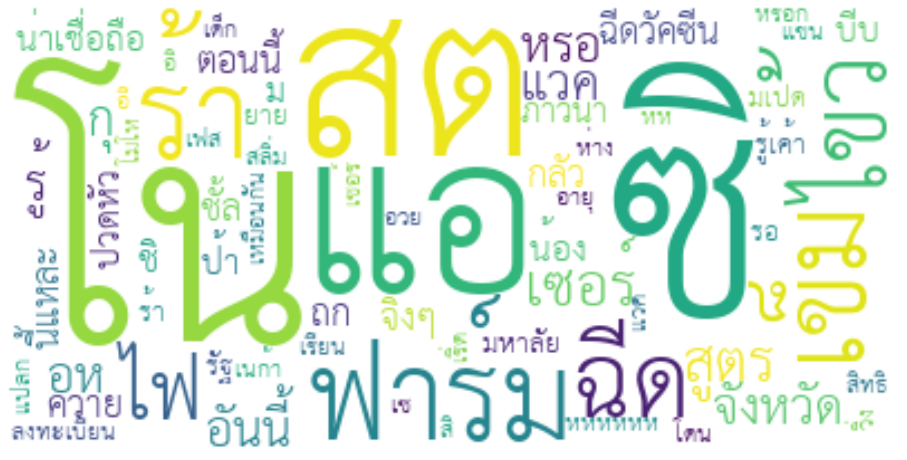

In [17]:
word_dict = {}
for i in range(0,len(keyword_df2)):
  word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path=path,background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

##Sentiment Analysis

In [18]:
import requests
url = "https://api.aiforthai.in.th/ssense"

data = {'text':data3.iloc[0]}
headers = {
    'Apikey': "GGROzYk8wbWN5uPPoe6p8qZCmSnJlrqX"
    }
 
response = requests.post(url, data=data, headers=headers)


print(response.json())

{'sentiment': {'score': '75', 'polarity-neg': False, 'polarity-pos': True, 'polarity': 'positive'}, 'preprocess': {'input': 'เด็กม.กุเริ่ดมากมีลงทะเบียนฉีดวัคซีนสูตรไขว้ซิโนฟาร์ม แอสตร้าหรือซิโนฟาร์ม ไฟเซอร์ ไม่รู้สูตรไขว้อันนี้มีนานรึยังแต่นี่เพิ่งเคยเห็นก็วันนี้แหละ ได้แต่ภาวนาให้น้องได้ไฟเซอร์กันเยอะๆ', 'neg': [], 'pos': ['เริ่ด'], 'segmented': ['เด็ก', 'ม.', 'กุ', 'เริ่ด', 'มาก', 'มี', 'ลงทะเบียน', 'ฉีดวัคซีน', 'สูตร', 'ไขว้', 'ซิ', 'โน', 'ฟาร์ม', ' ', 'แอ', 'สต', 'ร้า', 'หรือ', 'ซิ', 'โน', 'ฟาร์ม', ' ', 'ไฟ', 'เซอร์', ' ', 'ไม่รู้', 'สูตร', 'ไขว้', 'อันนี้', 'มีนา', 'นรึ', 'ยัง', 'แต่', 'นี่', 'เพิ่ง', 'เคย', 'เห็น', 'ก็', 'วันนี้', 'แหละ', ' ', 'ได้แต่', 'ภาวนา', 'ให้', 'น้อง', 'ได้', 'ไฟ', 'เซอร์', 'กัน', 'เย', 'อะ', 'ๆ'], 'keyword': ['เด็ก', 'ม.', 'กุ', 'ลงทะเบียน', 'ฉีดวัคซีน', 'สูตร', 'ไขว้', 'ซิ', 'โน', 'ฟาร์ม', 'แอ', 'ร้า', 'ซิ', 'โน', 'ฟาร์ม', 'ไฟ', 'เซอร์', 'ไม่รู้', 'สูตร', 'ไขว้', 'อันนี้', 'มีนา', 'นรึ', 'นี่', 'เพิ่ง', 'วันนี้', 'แหละ', 'ได้แต่', 'ภาวนา', 'น้อง', 'ไฟ'

In [51]:
import requests
import seaborn as sns
import pandas as pd
import json

for i in range(0,8):
  url = "https://api.aiforthai.in.th/ssense"
  data = {'text':data3.iloc[i]}
  headers = {
    'Apikey': "GGROzYk8wbWN5uPPoe6p8qZCmSnJlrqX"
    }
  response = requests.post(url, data=data, headers=headers)
  #print(response.json())
  j1 = json.loads(response.text)
  j2 = j1["sentiment"]
  j3 = j2["polarity"]

  print(j3)
  #sns.lineplot(j3)

positive


negative
negative





##Read result from analysis process

In [52]:
with open('/content/gdrive/My Drive/output_701/sinopharm_astra.txt', 'r') as f:
    #print(sum(line.count("negative") for line in f))
    output1 = (sum(line.count("negative") for line in f))

In [53]:
print(output1)

2


In [54]:
with open('/content/gdrive/My Drive/output_701/sinopharm_astra.txt', 'r') as f:
    #print(sum(line.count("positive") for line in f))
    output2 = (sum(line.count("positive") for line in f))

In [55]:
print(output2)

1


In [56]:
output3 = data3.size - (output1+output2)

In [57]:
print(output3)

5


In [58]:
final1 = [output2,output3,output1]

In [59]:
print(final1)

[1, 5, 2]


In [60]:
final2 = output2+output3+output1
print(final2)

8


In [61]:
final_out2 = output2*100/final2
final_out1 = output1*100/final2
final_out3 = output3*100/final2

In [62]:
print("percent of positive sentiment is "'{:.2f}'.format(final_out2))
print("percent of neutral sentiment is "'{:.2f}'.format(final_out3))
print("percent of negative sentiment is "'{:.2f}'.format(final_out1))

percent of positive sentiment is 12.50
percent of neutral sentiment is 62.50
percent of negative sentiment is 25.00


In [63]:
final_last = [final_out2,final_out3,final_out1]

##Barplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


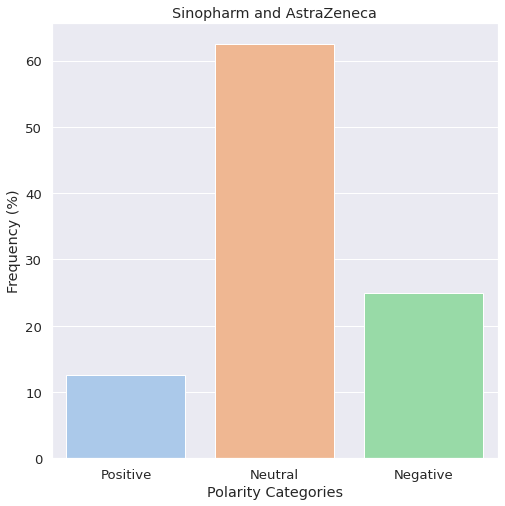

In [64]:
from google.colab import files

labels = ['Positive','Neutral','Negative']

#sns.set_style('ticks')
sns.set(font_scale = 1.2)
plt.figure(figsize=(8, 8))
ax = sns.barplot(labels,final_last, palette = 'pastel')
ax.set(title="Sinopharm and AstraZeneca")
plt.xlabel("Polarity Categories")
plt.ylabel("Frequency (%)")
plt.show()
#plt.savefig("sinopharm_astra.png")
#files.download("sinopharm_astra.png") 